In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from scipy import signal
import h5py, time

In [2]:
%matplotlib notebook

In [3]:
def getdata(fname, gain_error=1.0):

    f = h5py.File(fname,'r')
    pos_data = np.array(f['pos_data'])
    quad_data = np.array(f['quad_data'])
    
    ## special comment for Alex:
    ## fsamp is the sampling frequency
    ## in here I read it from the file
    global fsamp
    fsamp = f.attrs['Fsamp']
    fsamp /= f.attrs['downsamp']
    
    ## reshape and extract xyz data
    ## assuming the data contains the correct amount of samples ordered in a correct way
    ## in the reprocessor a testing prcedure has to be implemented 
    pos_xyz = pos_data.reshape(-1,11).T[2:5]
    quad_data = quad_data.reshape(-1,12)
    
    return pos_xyz, quad_data

In [4]:
import sys
sys.path.append('../../nadavp/new_trap/PythonScripts/')
import BeadDataFile

In [42]:
Ndata=1719
#fname = r'/home/data_transfer/data_from_windows/20190701/Bead2/InitialTest/Data%d.h5' % Ndata
fname = r"/home/data_transfer/data_from_windows/20190719/Bead1/Discharge/Discharge_%d.h5" % Ndata
#fname = r"D:\Data\20190628\Bead1\TransferFunction\TransFuncX_%d.h5" % Ndata
#data, _ = getdata(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz
#data = [BDF.x2, BDF.y2, BDF.z2]
fsamp=5000
res = 2**14
#res=50000
data_det=signal.detrend(data)
y_1000=1*data_det[1]
z_1000=100*data_det[2]

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
ypsd, freqs = matplotlib.mlab.psd(y_1000, Fs = fsamp, NFFT = res)
zpsd, freqs = matplotlib.mlab.psd(z_1000, Fs = fsamp, NFFT = res)

<IPython.core.display.Javascript object>


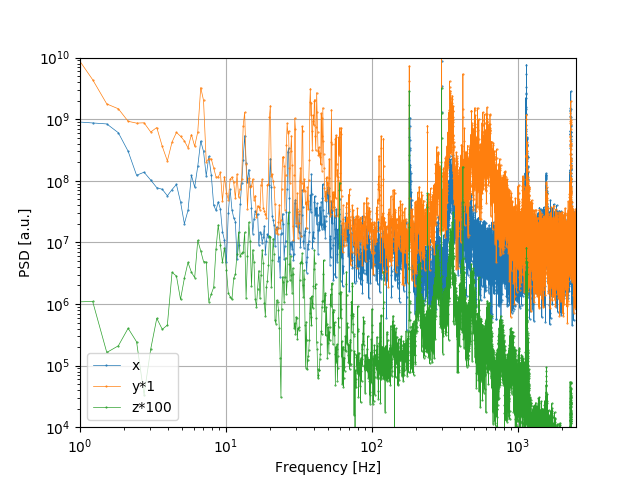

In [43]:
_,ax = plt.subplots()
ax.loglog(freqs, xpsd, '.-', label="x",markersize=1,linewidth=0.5)
ax.loglog(freqs, ypsd, '.-', label="y*1",markersize=1,linewidth=0.5)
ax.loglog(freqs, zpsd, '.-', label="z*100",markersize=1,linewidth=0.5)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
plt.ylim(1e4,1e10)
plt.grid(True)
#ofname='./AK_SavedFiles/Data%d.png' % Ndata
ofname='../Documents/AkioK/Discharge2%d.png' % Ndata
#ofname='../Documents/AkioK/TransFunc%d.png' % Ndata

#plt.savefig(ofname)

In [16]:
##code for plotting two graphs at the same time.

In [117]:
Ndata1=200
#fname1 = r"/home/data_transfer/data_from_windows/20190701/Bead2/InitialTest/Data%d.h5" % Ndata1
fname1 = r"/home/data_transfer/data_from_windows/20190719/Bead1/Discharge/Discharge_%d.h5" % Ndata1
data1, _ = getdata(fname1)
res = 2**14
res=50000
data_det1=signal.detrend(data1)
xpsd1, freqs1 = matplotlib.mlab.psd(data_det1[0], Fs = fsamp, NFFT = res)
ypsd1, freqs1 = matplotlib.mlab.psd(data_det1[1], Fs = fsamp, NFFT = res)
zpsd1, freqs1 = matplotlib.mlab.psd(data_det1[2], Fs = fsamp, NFFT = res)

In [126]:
Ndata2=326
#fname2 = r"/home/data_transfer/data_from_windows/20190701/Bead2/InitialTest/Data%d.h5" % Ndata2
fname2 = r"/home/data_transfer/data_from_windows/20190719/Bead1/Discharge/Discharge_%d.h5" % Ndata2
data2, _ = getdata(fname2)
data_det2=signal.detrend(data2)
xpsd2, freqs2 = matplotlib.mlab.psd(data_det2[0], Fs = fsamp, NFFT = res)
ypsd2, freqs2 = matplotlib.mlab.psd(data_det2[1], Fs = fsamp, NFFT = res)
zpsd2, freqs2 = matplotlib.mlab.psd(data_det2[2], Fs = fsamp, NFFT = res)

<IPython.core.display.Javascript object>


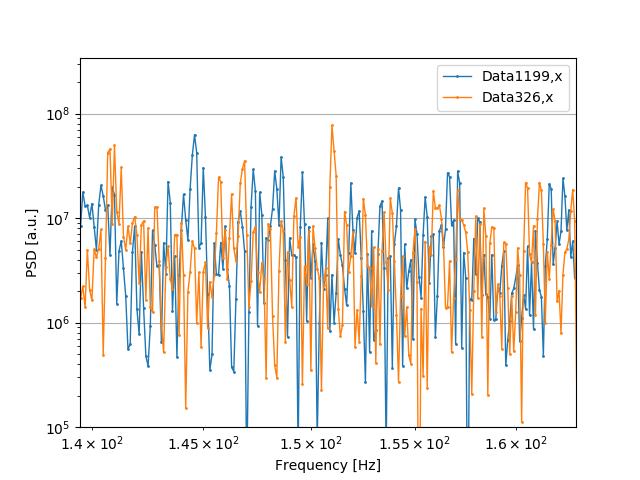

In [127]:
_,ax = plt.subplots()
label1='Data%d,x' % Ndata1
label2='Data%d,x' % Ndata2
ax.loglog(freqs1, xpsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, xpsd2, '.-', label=label2,markersize=2,linewidth=1)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
plt.ylim(1e5,1e10)
plt.grid(True)
ofname='./AK_SavedFiles/PlotDataX%d_%d.png' %(Ndata1, Ndata2)
plt.savefig(ofname)

<IPython.core.display.Javascript object>


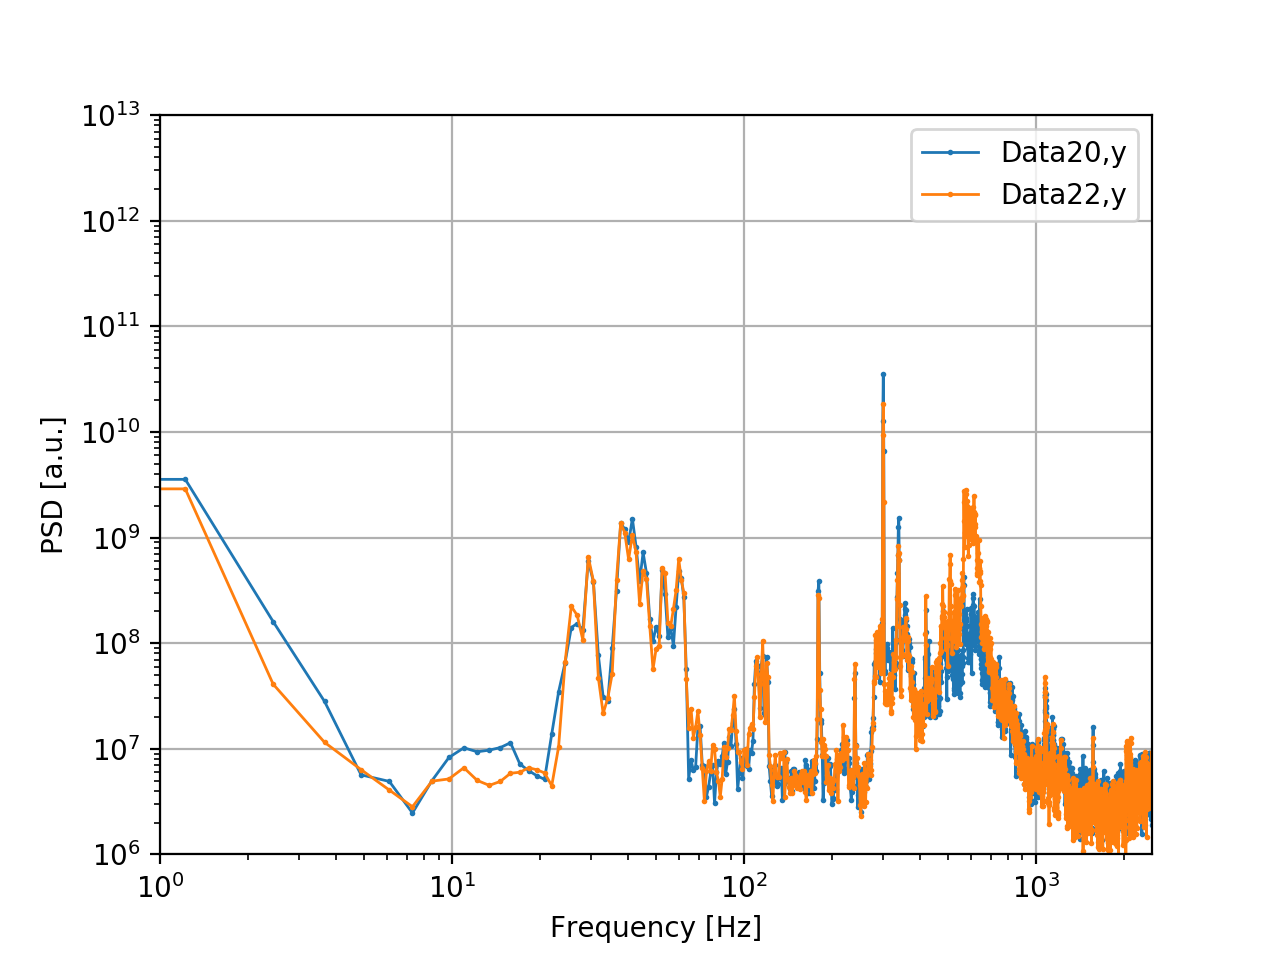

In [32]:
_,ax = plt.subplots()
label1='Data%d,y' % Ndata1
label2='Data%d,y' % Ndata2
ax.loglog(freqs1, ypsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, ypsd2, '.-', label=label2,markersize=2,linewidth=1)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
plt.ylim(1e6,1e13)
plt.grid(True)
ofname='./AK_SavedFiles/PlotDataY%d_%d.png' %(Ndata1, Ndata2)
plt.savefig(ofname)

<IPython.core.display.Javascript object>


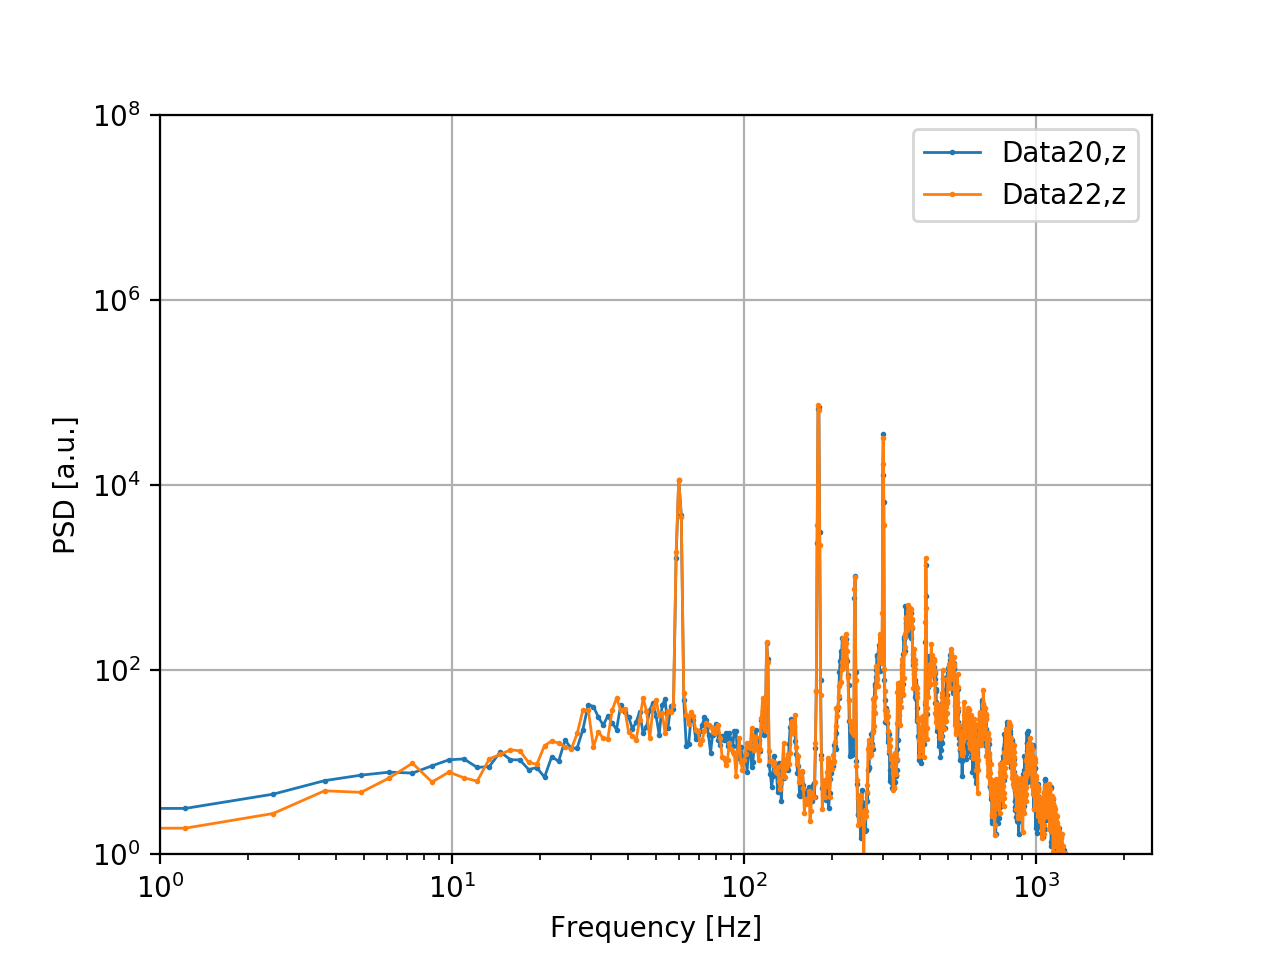

In [33]:
_,ax = plt.subplots()
label1='Data%d,z' % Ndata1
label2='Data%d,z' % Ndata2
ax.loglog(freqs1, zpsd1, '.-', label=label1,markersize=2,linewidth=1)
ax.loglog(freqs2, zpsd2, '.-', label=label2,markersize=2,linewidth=1)

ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
plt.ylim(1,1e8)
plt.grid(True)
ofname='./AK_SavedFiles/PlotDataZ%d_%d.png' %(Ndata1, Ndata2)
plt.savefig(ofname)

In [34]:
##code for Transfer Function

In [37]:
##X preparation
NdataX=10
fname = r"/home/data_transfer/data_from_windows/20190628/Bead1/TransferFunction/TransFuncX_%d.h5" % NdataX
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz
res=50000
data_det=signal.detrend(data)
fbase=11

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res)
Noise0X=np.sqrt(xpsd[fbase*10])
XnoiseX=np.sqrt(xpsd)
XnoiseY=np.sqrt(ypsd)
XnoiseZ=np.sqrt(zpsd)

No cantilever data


In [38]:
##Y preparation
NdataY=11
fname = r"/home/data_transfer/data_from_windows/20190628/Bead1/TransferFunction/TransFuncY_%d.h5" % NdataY
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz
res=50000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res)
Noise0Y=np.sqrt(ypsd[fbase*10])
YnoiseX=np.sqrt(xpsd)
YnoiseY=np.sqrt(ypsd)
YnoiseZ=np.sqrt(zpsd)

No cantilever data


In [39]:
##Z preparation
NdataZ=9
fname = r"/home/data_transfer/data_from_windows/20190628/Bead1/TransferFunction/TransFuncZ_%d.h5" % NdataZ
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz
res=50000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res)
Noise0Z=np.sqrt(zpsd[110])
ZnoiseX=np.sqrt(xpsd)
ZnoiseY=np.sqrt(ypsd)
ZnoiseZ=np.sqrt(zpsd)

No cantilever data


In [40]:
q=12
V=0.9
F=(q*1.602e-19)*(V*2/8.6e-3*0.65)
Nharm=50

FnoiseXX=XnoiseX/Noise0X*F
FnoiseXY=XnoiseY/Noise0Y*F
FnoiseXZ=XnoiseZ/233*7.26e-16
FnoiseYX=YnoiseX/Noise0X*F
FnoiseYY=YnoiseY/Noise0Y*F
FnoiseYZ=YnoiseZ/Noise0Z*F
FnoiseZX=ZnoiseX/Noise0X*F
FnoiseZY=ZnoiseY/Noise0Y*F
FnoiseZZ=ZnoiseZ/Noise0Z*F

TFXX=np.zeros(Nharm)
TFXY=np.zeros(Nharm)
TFXZ=np.zeros(Nharm)
TFYX=np.zeros(Nharm)
TFYY=np.zeros(Nharm)
TFYZ=np.zeros(Nharm)
TFZX=np.zeros(Nharm)
TFZY=np.zeros(Nharm)
TFZZ=np.zeros(Nharm)

FreqTF=np.zeros(Nharm)
for i in range(Nharm):
    FreqTF[i]=fbase*(i+1)
    TFXX[i]=FnoiseXX[fbase*10*(i+1)]
    TFXY[i]=FnoiseXY[fbase*10*(i+1)]
    TFXZ[i]=FnoiseXZ[fbase*10*(i+1)]
    TFYX[i]=FnoiseYX[fbase*10*(i+1)]
    TFYY[i]=FnoiseYY[fbase*10*(i+1)]
    TFYZ[i]=FnoiseYZ[fbase*10*(i+1)]
    TFZX[i]=FnoiseZX[fbase*10*(i+1)]
    TFZY[i]=FnoiseZY[fbase*10*(i+1)]
    TFZZ[i]=FnoiseZZ[fbase*10*(i+1)]

In [41]:
ofname = "./AK_SavedFiles/TFBead1.txt" 
f1 = open(ofname,"a")
for i in range(Nharm):
    f1.write('%f %e %e %e %e %e %e %e %e %e\n' % (FreqTF[i],TFXX[i],TFXY[i],TFXZ[i],
                                                  TFYX[i],TFYY[i],TFYZ[i],TFZX[i],TFZY[i],TFZZ[i]))
f1.close()

In [ ]:
## Plotting the force sensitivity with transfer function compensation

In [9]:
Ndata=201
fname = r"/home/data_transfer/data_from_windows/20190719/Bead1/Discharge/Discharge_%d.h5" % Ndata
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz
res = 2**14
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res)

w0x=441.982
gx=186.267

w0y=329.337
gy=38.7549

w0z=305.196
gz=285.345

#wz1=305.196
#wz2=285.345

f0=23
F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
#NormX=1/((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
#NormY=1/((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)
#F0z=1/(np.sqrt(1+wz1*wz1/(f0*f0))*np.sqrt(1+(f0*f0)/(wz1*wz1))*(1+(f0*f0)/(wz2*wz2)))
#NormZ=1/(np.sqrt(1+wz1*wz1/(freqs*freqs))*np.sqrt(1+(freqs*freqs)/(wz1*wz1))*(1+(freqs*freqs)/(wz2*wz2)))

F=7.26e-16


xnsd=np.sqrt(xpsd)*(F/1.38e5)*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
ynsd=np.sqrt(ypsd)*(F/2.45e5)*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
znsd=np.sqrt(zpsd)*(F/233)*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

<IPython.core.display.Javascript object>


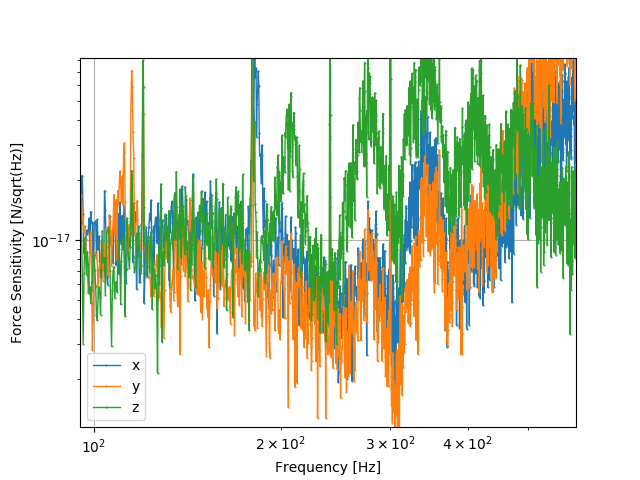

In [11]:
_,ax = plt.subplots()
ax.loglog(freqs, xnsd, '.-', label="x",markersize=1,linewidth=1)
ax.loglog(freqs, ynsd, '.-', label="y",markersize=1,linewidth=1)
ax.loglog(freqs, znsd, '.-', label="z",markersize=1,linewidth=1)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Force Sensitivity [N/sqrt(Hz)]')
plt.xlim(1,1000)
plt.ylim(1e-18,1e-15)
plt.grid(True)
ofname='./AK_SavedFiles/ForceSensitivity%d.png' % Ndata

plt.savefig(ofname)

In [45]:
## Shaking data analysis

In [189]:
Ndata=24
fname = r'/home/data_transfer/data_from_windows/20190708/Bead2/Shaking/ShakingY_%d0.h5' % Ndata
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz
fsamp=5000
res=50000

data_det=signal.detrend(data)
x_1000=1*data_det[0]
y_1000=1*data_det[1]
z_1000=1*data_det[2]

xpsd, freqs = matplotlib.mlab.psd(x_1000, Fs = fsamp, NFFT = res)
ypsd, freqs = matplotlib.mlab.psd(y_1000, Fs = fsamp, NFFT = res)
zpsd, freqs = matplotlib.mlab.psd(z_1000, Fs = fsamp, NFFT = res)

<IPython.core.display.Javascript object>


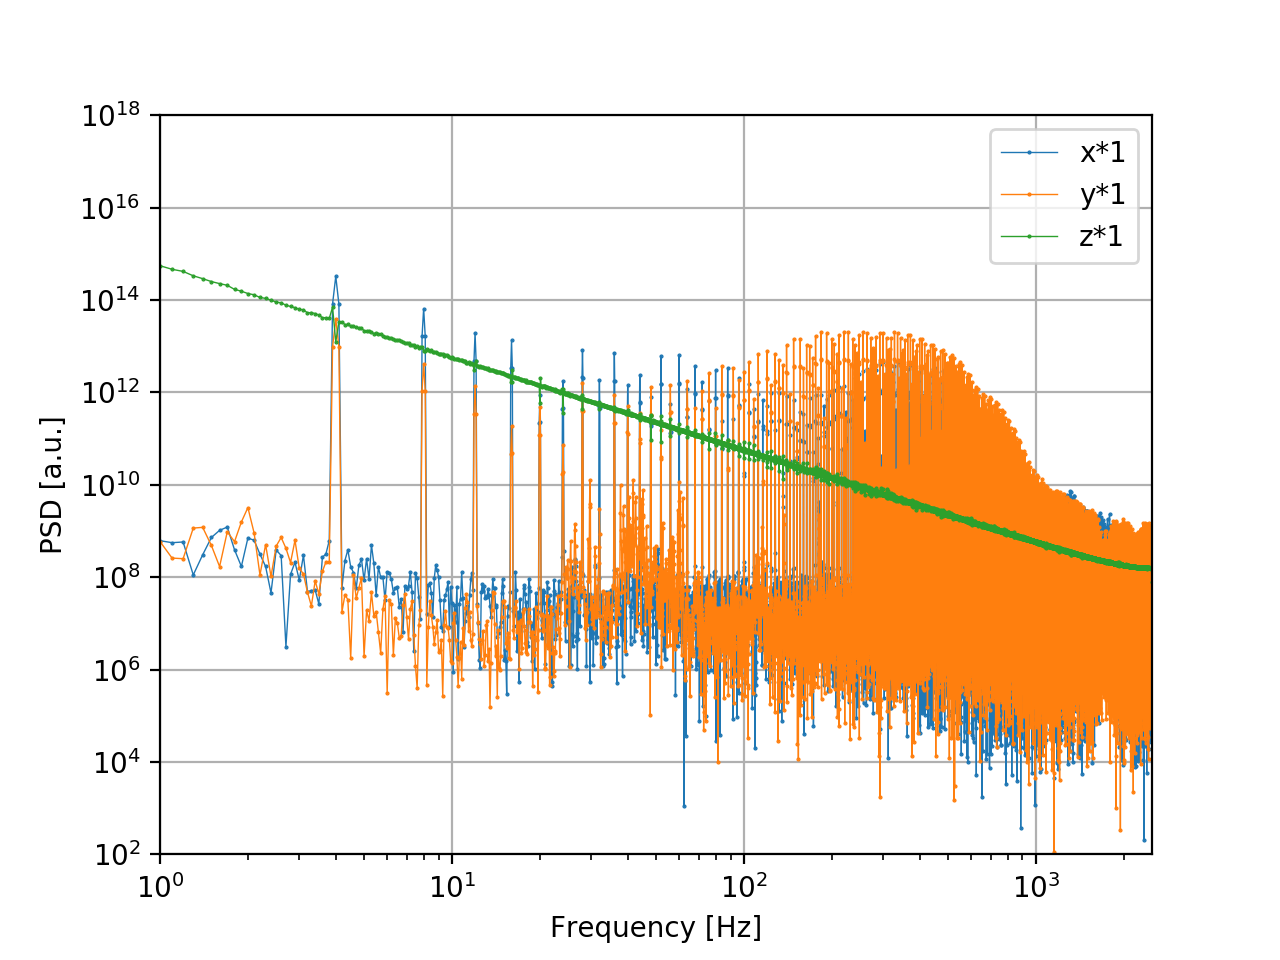

In [190]:
_,ax = plt.subplots()
ax.loglog(freqs, xpsd, '.-', label="x*1",markersize=1,linewidth=0.5)
ax.loglog(freqs, ypsd, '.-', label="y*1",markersize=1,linewidth=0.5)
ax.loglog(freqs, zpsd, '.-', label="z*1",markersize=1,linewidth=0.5)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
plt.xlim(1,2500)
plt.ylim(1e2,1e18)
plt.grid(True)
ofname='./AK_SavedFiles/ShakingY%d.png' % Ndata
plt.savefig(ofname)

In [191]:
ofname = "./AK_SavedFiles/ShakeYResponse%d.txt" % Ndata
f1 = open(ofname,"a")

for i in range(200):
    f1.write('%f %e %e %e\n' % (4*(i+1),np.sqrt(xpsd[40*(i+1)]),np.sqrt(ypsd[40*(i+1)]),np.sqrt(zpsd[40*(i+1)])))
f1.close()

In [192]:
## extracting the beam profiling data

In [200]:
Ndata=42
fname = r'/home/data_transfer/data_from_windows/20190715/NoBead/X350_Y2200.h5' 
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz
fsamp=5000
res = 2**12
#res=50000
#data_det=signal.detrend(data)

<IPython.core.display.Javascript object>


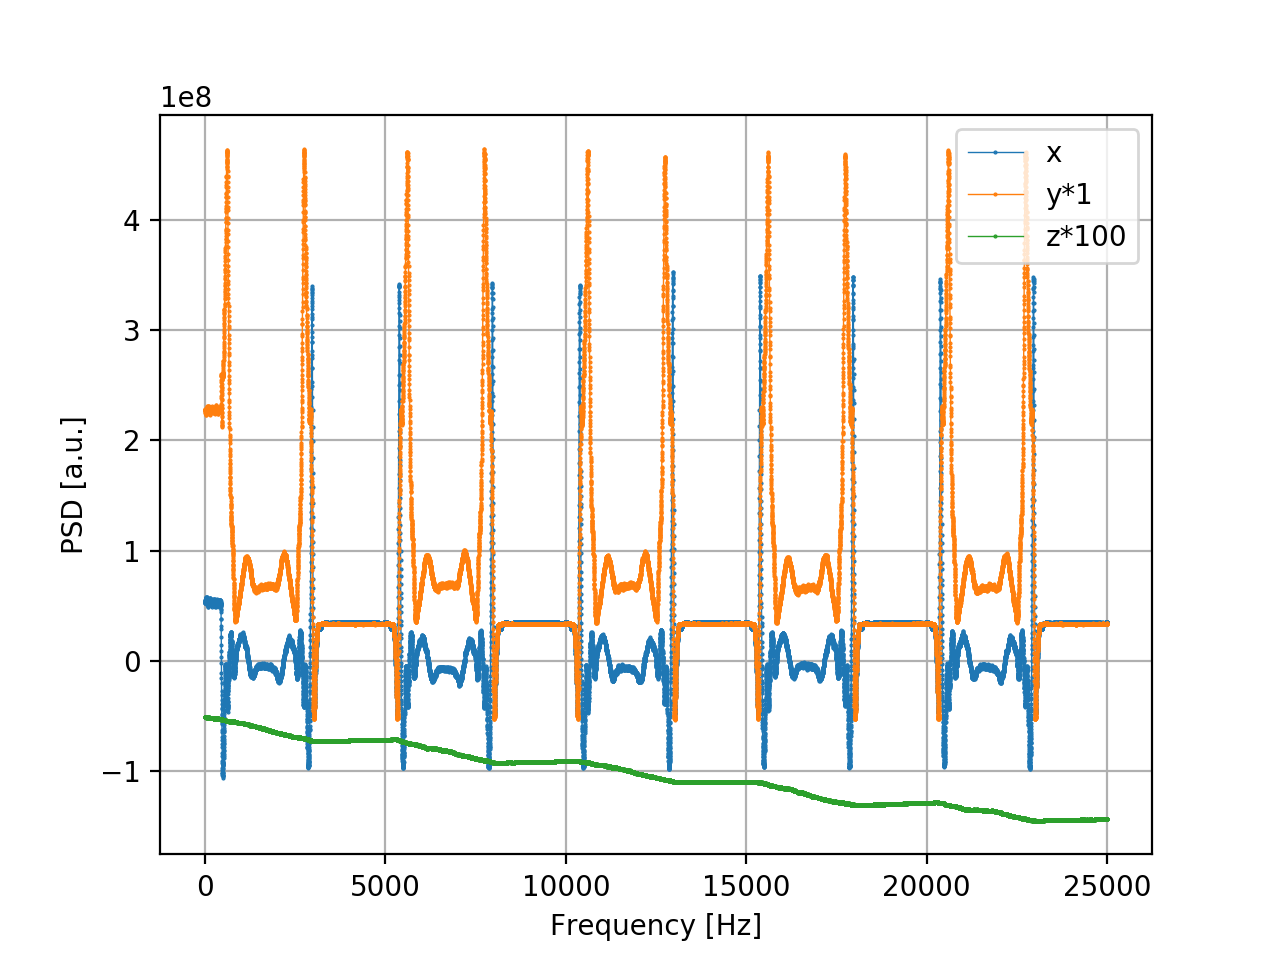

In [201]:
_,ax = plt.subplots()
ax.plot(data[0], '.-', label="x",markersize=1,linewidth=0.5)
ax.plot(data[1], '.-', label="y*1",markersize=1,linewidth=0.5)
ax.plot(data[2], '.-', label="z*100",markersize=1,linewidth=0.5)
ax.legend()
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('PSD [a.u.]')
#plt.xlim(1,2500)
#plt.ylim(1e4,1e10)
plt.grid(True)
ofname='./AK_SavedFiles/Data%d.png' % Ndata
#ofname='../Documents/AkioK/Discharge2%d.png' % Ndata
#ofname='../Documents/AkioK/TransFunc%d.png' % Ndata

#plt.savefig(ofname)

In [72]:
##Millicharge Analysis

In [130]:
for i in range(200,1200):
    Ndata1=i
    fname1 = r"/home/data_transfer/data_from_windows/20190719/Bead1/Discharge/Discharge_%d.h5" % Ndata1
    data1, _ = getdata(fname1)
    res=50000
    data_det1=signal.detrend(data1)
    xpsd1, freqs1 = matplotlib.mlab.psd(data_det1[0], Fs = fsamp, NFFT = res)
    ypsd1, freqs1 = matplotlib.mlab.psd(data_det1[1], Fs = fsamp, NFFT = res)
    zpsd1, freqs1 = matplotlib.mlab.psd(data_det1[2], Fs = fsamp, NFFT = res)
    
    nsd1=np.sqrt(zpsd1[1510])
    nsd2=np.sqrt(ypsd1[1510])
    nsd3=np.sqrt(ypsd1[3050])
    nsd4=np.sqrt(ypsd1[3070])
    nsd5=np.sqrt(ypsd1[3090])
    nsd6=np.sqrt(ypsd1[3110])
    nsd7=np.sqrt(ypsd1[3130])
    nsd8=np.sqrt(ypsd1[3150])
    nsd9=np.sqrt(ypsd1[3170])
    
    
    with open ('./AK_SavedFiles/Output_yz.txt', 'a') as f:
        f.write('%d\t%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f\n' %(Ndata1, nsd1, nsd2, nsd3, nsd4, nsd5, nsd6, nsd7, nsd8, nsd9))

In [128]:
np.sqrt(xpsd2[1510])
with open ('./AK_SavedFiles/Output251.txt', 'a') as f:
        f.write('%d\t%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f\t%f\n' %(Ndata1, nsd1, nsd2, nsd3, nsd4, nsd5, nsd6, nsd7, nsd8, nsd9))

In [116]:
np.sqrt(xpsd2[1510])/14000

0.01834767564675427